In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import tensorflow as tf
from parsivar import Normalizer
from parsivar import Tokenizer
from parsivar import FindStems
from string import digits
import math
import pickle

In [2]:
dataset = pd.read_csv('twitter_corona981_full.csv')
for i in dataset.keys():
    print(i,end='\t\t|')

twitt_id		|favorite_count		|hashtagField		|location		|mentionField		|ownerId		|ownerName		|postId		|reply_count		|retweet_count		|retweeted_ownerId		|retweeted_postId		|tagField		|textField		|textField_normal		|time_jalali		|timestamp		|

In [44]:
dataset

,twitt_id,favorite_count,hashtagField,location,mentionField,ownerId,ownerName,postId,reply_count,retweet_count,retweeted_ownerId,retweeted_postId,tagField,textField,textField_normal,time_jalali,timestamp
0,0,"""0""","""ویروس_کرونا""","""جمهوری اسلامی ایران""","""""",1140945568505708544,"""Safire_Mehr""",1221133198379192321,"""0""","""0""","""0""","""0""","""""","""کرونا داشتیم وقتی کرونا مد نبود #ویروس_کرونا""","""کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا""",1398-11-05 21:40:16,1579975816
1,1,"""0""","""ویروس_کرونا;کرونا""","""""","""""",1221925473900429313,"""Jonny_walker666""",1223016973975674881,"""0""","""0""","""0""","""0""","""""","""گفتم کرونا ناراحت نشه یه موقع #کرونا #ویروس_ک...","""گفتم کرونا ناراحت نشه یه موقع کرونا ویروس کرونا""",1398-11-11 02:25:43,1580424943
2,2,"""3""","""ویروس_کرونا""","""""","""""",1214838745918259200,"""rzRz471""",1220858435044093952,"""0""","""1""","""0""","""0""","""ویروس کرونا""","""ویروس کرونا داشتیم وقتی کرونا مد نبود #ویروس_...","""ویروس کرونا داشتیم وقتی کرونا مد نبود ویروس ک...",1398-11-05 03:28:28,1579910308
3,3,"""0""","""""","""""","""""",866686549722845184,"""laleh_wazhegoon""",1220980152122953729,"""0""","""0""","""0""","""0""","""""","""اینجا کرونا آنجا کرونا همه جا کرونا این کرونا...","""اینجا کرونا انجا کرونا همه جا کرونا این کرونا...",1398-11-05 11:32:07,1579939327
4,4,"""0""","""""","""""","""seyedmohammadww""",1182218416012312576,"""VTPmKSO7wFxM8gZ""",1220760647232901120,"""0""","""0""","""1110607722624573441""","""1220669177826041856""","""ویروس کرونا""","""RT @seyedmohammadww: اسلام از ویروس کرونا کشن...","""rt seyedmohammadww اسلام از ویروس کرونا کشنده...",1398-11-04 20:59:53,1579886993
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67017,67017,"""0""","""""","""""","""""",619528434,"""tgjuofficial""",1222423019663982592,"""0""","""0""","""0""","""0""","""طلا و ارز;قیمت نفت;احتمال کاهش;کاهش تولید;تول...","""شبکه طلا و ارز - قیمت نفت بعد از پنج روز سقوط...","""شبکه طلا و ارز قیمت نفت بعد از پنج روز سقوط ج...",1398-11-09 11:05:34,1580283334
67018,67018,"""0""","""""","""""","""""",619528434,"""tgjuofficial""",1221736996353138688,"""0""","""0""","""0""","""0""","""طلا و ارز;کاهش قیمت;قیمت جهانی;جهانی نفت;کاهش...","""شبکه طلا و ارز - کاهش قیمت جهانی نفت: گروه اق...","""شبکه طلا و ارز کاهش قیمت جهانی نفت گروه اقتصا...",1398-11-07 13:39:33,1580119773
67019,67019,"""0""","""""","""""","""""",619528434,"""tgjuofficial""",1220995754497462272,"""0""","""0""","""0""","""0""","""طلا و ارز;قیمت نفت;شدیدترین افت;افت قیمت;قیمت...","""شبکه طلا و ارز - سقوط ۸ درصدی قیمت نفت: قیمت ...","""شبکه طلا و ارز سقوط 8 درصدی قیمت نفت قیمت نفت...",1398-11-05 12:34:07,1579943047
67020,67020,"""4""","""نفت;کروناویروس;ویروس_کرونا;چین""","""""","""""",1163449343598313476,"""FarazDaily""",1221116471633416192,"""0""","""1""","""0""","""0""","""اقتصادی بزرگی;کشورهای جهان;سایر کشورهای جهان""","""نفس #نفت در دست #کروناویروس شیوع #ویروس_کرونا...","""نفس نفت در دست کروناویروس شیوع ویروس کرونا در...",1398-11-05 20:33:48,1579971828


In [45]:
keys=['twitt_id','textField_normal']
data=dataset[keys].copy()

In [46]:
data

,twitt_id,textField_normal
0,0,"""کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا"""
1,1,"""گفتم کرونا ناراحت نشه یه موقع کرونا ویروس کرونا"""
2,2,"""ویروس کرونا داشتیم وقتی کرونا مد نبود ویروس ک..."
3,3,"""اینجا کرونا انجا کرونا همه جا کرونا این کرونا..."
4,4,"""rt seyedmohammadww اسلام از ویروس کرونا کشنده..."
...,...,...
67017,67017,"""شبکه طلا و ارز قیمت نفت بعد از پنج روز سقوط ج..."
67018,67018,"""شبکه طلا و ارز کاهش قیمت جهانی نفت گروه اقتصا..."
67019,67019,"""شبکه طلا و ارز سقوط 8 درصدی قیمت نفت قیمت نفت..."
67020,67020,"""نفس نفت در دست کروناویروس شیوع ویروس کرونا در..."


In [47]:
mokasar = pd.read_csv('mokasar.csv')
mokasar = mokasar.values.tolist()
stop_words ={"از","این","آن","به","با","بر","برای","پس","تا","در","را","که","و","ها","های","تر","ترین","ام","ات","اش","مان","تان",'من','تو','او','ما','شما','رو','اگر','اگه','هر','همه',"شان",}
punctuations = ['!', '"', '$', '%', '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '>', '?', '[', '\\', ']', '_', '|', '«', '»', '،', '؛', '؟', '‘', '’']
connected_pronouns = ["ام","ات","اش","مان","تان","شان",]
chardict={'ؤ':'و','ي':'ی','أ':'ا','إ':'ا','آ':'ا','ك':'ک','ة':'ه'}
hashu={ 'داره':'دارد', 'میگه':'گفت', 'دارن':'دارند', 'باشه':'باشد', 'میشه':'شد'}
with open ('stop_words', 'rb') as fp:
    sw = pickle.load(fp)

In [48]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [51]:
"""
cleansup function
________________
inputs:
text(string)

output:
cleand text(string)
________________
summery:
it removes English punctuations links(with http) and tags(with @)
also it apply lower case for english alphabets
"""

def cleanup(text):
    
    #import string
    punctuation = '[!-.:?;"\n"()''"",_%$|/,<>’‘]'
    pattern = re.compile(punctuation)
    text_subbed = re.sub(pattern, '', text)
    
    text_subbed=text_subbed.lower()
    
    #remove username with a @ and remove the link which start with http
    juntext = " ".join(filter(lambda x:x[0]!='@', text_subbed.split()))
    juntext = " ".join(filter(lambda x:not 'http' in x, juntext.split()))
    
    
    return juntext


In [52]:
# data['textField_clean'] = data['textField_normal'].apply(cleanup) 
cleanup(data['textField_normal'][0])

'کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا'

In [53]:
def tokenize_doc(dw):
    vector=[]
    
    try:
        remove_digits = str.maketrans('', '',digits)
        dw = dw.translate(remove_digits)
        
    except:
        print(dw)
        return
    dw2=''
    for w in dw:
        if w in hashu:
              w=hashu[w]
        dw2+=w
    dw=dw2

    mynorm=Normalizer()
    dw=mynorm.normalize(dw)

    mytoken=Tokenizer()
    words=mytoken.tokenize_words(dw)
    
    mystem=FindStems()
    stemWords=set()
    
    for w in words:
        if w.isnumeric() or isEnglish(w) or w in sw :
            continue

        else:
            w=w.translate(str.maketrans(chardict))
            stemWords.add(mystem.convert_to_stem(w))
    

        
        
    return list(stemWords)

In [54]:
data['textField_normal'] = data['textField_normal'].apply(cleanup) 
data['msg_tokenied']     = data['textField_normal'].apply(lambda x:tokenize_doc(x))
data['msg_sent']         = data['msg_tokenied'].apply(lambda x:" ".join(x)) 

In [74]:
data[msg_sent][4].split()

,twitt_id,textField_normal,msg_tokenied,msg_sent
0,0,کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا,"[ویروس, کرونا, مد]",ویروس کرونا مد
1,1,گفتم کرونا ناراحت نشه یه موقع کرونا ویروس کرونا,"[ویروس, موقع, کرونا, نشه, ناراحت]",ویروس موقع کرونا نشه ناراحت
2,2,ویروس کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا,"[ویروس, کرونا, مد]",ویروس کرونا مد
3,3,اینجا کرونا انجا کرونا همه جا کرونا این کرونا ...,"[هم‌شده‌شبیه, کرونا, انجا, اخوندا]",هم‌شده‌شبیه کرونا انجا اخوندا
4,4,rt seyedmohammadww اسلام از ویروس کرونا کشنده ...,"[سنگسار, نمیک, ویروس, زد&زن, اعدام, کشید&کش, ا...",سنگسار نمیک ویروس زد&زن اعدام کشید&کش انتهاری ...
...,...,...,...,...
67017,67017,شبکه طلا و ارز قیمت نفت بعد از پنج روز سقوط جه...,"[جهش, سقوط, احتمال, طلا, نفت, تولید, نقل, مهر,...",جهش سقوط احتمال طلا نفت تولید نقل مهر ویروس قی...
67018,67018,شبکه طلا و ارز کاهش قیمت جهانی نفت گروه اقتصاد...,"[چین, قرنطینه, طلا, نفت, سنت, دلار, ویروس, قیم...",چین قرنطینه طلا نفت سنت دلار ویروس قیمت بشکه ا...
67019,67019,شبکه طلا و ارز سقوط 8 درصدی قیمت نفت قیمت نفت ...,"[سقوط, چین, دلیل, طلا, نفت, ارزش, ویروس, نسبت,...",سقوط چین دلیل طلا نفت ارزش ویروس نسبت شیوع قیم...
67020,67020,نفس نفت در دست کروناویروس شیوع ویروس کرونا در ...,"[جهان, وارد, کیفیت, چین, نفت, نفر, کروناویروس,...",جهان وارد کیفیت چین نفت نفر کروناویروس ویروس ش...


# Write

In [90]:
with open('data', 'wb') as fp:
    pickle.dump(data, fp)

# Read

In [3]:
with open ('data', 'rb') as fp:
    data = pickle.load(fp)

# classificate data with LDA

In [55]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda_clf = LinearDiscriminantAnalysis()

In [56]:
# temp=list(data['msg_tokenied'])

In [57]:
# from collections import defaultdict
# import math
# doccounter=len(temp)
# DF = defaultdict(int) 
# for words in temp:
#     for word in (words):
#         DF[word] += 1  # defaultdict simplifies your "if key in word_idf: ..." part.

# # compute IDF.
# IDF = dict()
# for word in DF:
#     if DF[word]>5:
#         IDF[word] = ( float(DF[word])/doccounter ) # Don't forget that python2 uses integer division.
#     else:
#         IDF[word]=1

In [94]:
# min_idf=5
# max_idf=0.9
# temp_2=[]
# for d in temp:
#     d2=[]
#     for w in d:
#         if IDF[w]<0.9:
#             d2.append(w)
#     temp_2.append(d2)
    

In [95]:
# temp=temp_2


0                                       [کرونا, مد, ویروس]
1                        [موقع, نشه, ویروس, کرونا, ناراحت]
2                                       [کرونا, مد, ویروس]
3                       [کرونا, اخوندا, انجا, هم‌شده‌شبیه]
4        [ویروس, اسلام, اعدام, نمیک, مبتلا, کرد&کن, کرو...
                               ...                        
67017    [قیمت, سقوط, خبر, دنبال, گزارش, خبرنگار, کاهش,...
67018    [برن, بشکه, قیمت, موجب, معادل, گزارش, کاهش, کر...
67019    [نگرانی, قیمت, سفر, سقوط, دست, محدود, شدید, کا...
67020    [لطمه, کیفیت, دست, وارد, کرونا, نفس, شیوع, چین...
67021    [ممکنه, غده, نکنه, دست, داعش, ریشه, الوده, میگ...
Name: msg_tokenied, Length: 67022, dtype: object

In [60]:
# import gensim.corpora as corpora
# # Create Dictionary
# id2word = corpora.Dictionary(temp)
# id2word.filter_extremes(no_below=5, no_above=0.50)
# # Create Corpus
# texts =temp
# # Term Document Frequency
# corpus = [id2word.doc2bow(text) for text in texts]
# # View
# print(corpus[:1][0][:30])


[(0, 1)]


In [61]:
# from gensim.models import LdaMulticore
# from pprint import pprint
# # number of topics
# num_topics = 8
# # Build LDA model
# lda_model = LdaMulticore(corpus=corpus,
#                          id2word=id2word,
#                          num_topics=num_topics)
# # Print the Keyword in the 10 topics
# # pprint(lda_model.print_topics())
# doc_lda = lda_model[corpus]


In [62]:
# t=lda_model.print_topics(num_topics=10, num_words=20)
# for x in t:
#     print('\n>> Categury:',x[0])
#     for w in str(x[1:]).split('+'):
#         print(w,end='\t')



>> Categury: 0
('0.031*"ایران" 	 0.019*"چین" 	 0.011*"کشور" 	 0.010*"نفر" 	 0.010*"شیوع" 	 0.010*"بهداشت" 	 0.010*"مبتلا" 	 0.009*"ورود" 	 0.008*"گلوله" 	 0.007*"قرنطینه" 	 0.007*"نگرانی" 	 0.007*"میگه" 	 0.006*"وزیر" 	 0.006*"چینی" 	 0.006*"مشکوک" 	 0.006*"شهر" 	 0.006*"جمعه" 	 0.006*"خبر" 	 0.006*"لحظه" 	 0.005*"خواند&خوان"',)	
>> Categury: 1
('0.027*"ایران" 	 0.019*"چین" 	 0.013*"وارد" 	 0.009*"مرز" 	 0.008*"چینی" 	 0.008*"درمان" 	 0.007*"امام" 	 0.007*"خبر" 	 0.007*"شیوع" 	 0.007*"سلیمانی" 	 0.006*"داروی" 	 0.006*"مادر" 	 0.006*"داد&ده" 	 0.005*"توانست&توان" 	 0.005*"ورود" 	 0.005*"امریکا" 	 0.005*"بیمارستان" 	 0.005*"مسیولین" 	 0.005*"داره" 	 0.005*"مرد&میر"',)	
>> Categury: 2
('0.029*"چین" 	 0.015*"مبتلا" 	 0.015*"نفر" 	 0.013*"ایران" 	 0.012*"چینی" 	 0.011*"بهداشت" 	 0.011*"فوری" 	 0.010*"دلیل" 	 0.009*"گسترش" 	 0.008*"جهانی" 	 0.008*"کشور" 	 0.007*"استان" 	 0.007*"دید&بین" 	 0.007*"استاندار" 	 0.007*"تحصیلی" 	 0.007*"مقاطع" 	 0.007*"هاوشینگ" 	 0.007*"کشته" 	 0.007*"سازمان" 	 0

In [63]:
# import csv
# with open('res.csv', 'w', encoding='UTF8') as f:
#     # create the csv writer
#     writer = csv.writer(f)
#     for row in lda_model.print_topics(num_topics=1, num_words=20):
#         # write a row to the csv file
#         writer.writerow(row)

In [64]:
# # Compute Perplexity
# print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.
# from gensim.models import CoherenceModel
# # Compute Coherence Score
# coherence_model_lda = CoherenceModel(model=lda_model, texts=temp, dictionary=id2word, coherence='c_v')
# coherence_lda = coherence_model_lda.get_coherence()
# print('\nCoherence Score: ', coherence_lda)



Perplexity:  -7.622424475310875

Coherence Score:  0.2005652296594109


In [65]:
# # Visualize the topics
# import pyLDAvis
# pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis

c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.147078 -0.032971       1        1  14.272729
2      0.079949 -0.006946       2        1  13.942256
3     -0.035020 -0.001474       3        1  13.013078
5     -0.069812  0.038301       4        1  12.836772
4     -0.018136  0.059199       5        1  12.559935
1     -0.047646  0.106144       6        1  11.720766
0      0.047009 -0.017434       7        1  11.706864
7     -0.103421 -0.144821       8        1   9.947600, topic_info=        Term         Freq        Total Category  logprob  loglift
4029   بی‌بی  1002.000000  1002.000000  Default  30.0000  30.0000
2915   اخیرا  1002.000000  1002.000000  Default  29.0000  29.0000
1513      سی  1250.000000  1250.000000  Default  28.0000  28.0000
30      خفاش  2468.000000  2468.000000  Default  27.0000  27.0000
1027    مسری   991.000000   991.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
550   جمهوری   260.773369  2520.678211   Topic8  -5.5070   0.0392
182     کشور   265.926913  4874.575253   Topic8  -5.4875  -0.6007
297     وارد   254.825279  4083.251715   Topic8  -5.5301  -0.4662
381     میگن   238.610466  1839.271750   Topic8  -5.5958   0.2655
338       به   226.553421  1139.618440   Topic8  -5.6477   0.6924

[678 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
74        1  0.098362   آمد&آ
74        2  0.034300   آمد&آ
74        3  0.158892   آمد&آ
74        4  0.059521   آمد&آ
74        5  0.354102   آمد&آ
...     ...       ...     ...
3560      3  0.043136  یادمون
3560      4  0.899684  یادمون
3560      5  0.012324  یادمون
6422      7  0.919620     یمن
4317      8  0.913442  یوتیوب

[2373 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 4, 6, 5, 2, 1, 8])

In [4]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(
analyzer='word',       
min_df=5,# minimum required occurences of a word 
max_df=0.9,
max_features=5000,# max number of unique words
                            )

In [5]:
data_matrix = vectorizer.fit_transform(data['msg_sent'])
data_matrix

<67022x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 736217 stored elements in Compressed Sparse Row format>

In [6]:
lda_model = LatentDirichletAllocation(
n_components=10, # Number of topics
learning_method='online',
random_state=20,       
n_jobs = -1  # Use all available CPUs
                                     )


In [78]:
lda_output = lda_model.fit_transform(data_matrix)

c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\joblib\numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\joblib\numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [93]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda_model, data_matrix, vectorizer, mds='tsne')

c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\joblib\numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\pyLDAvis\_prepare.py:248: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)
c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\sklearn\manifold\_t_sne.py:699: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  FutureWarning


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
7      32.420952   8.115230       1        1  18.398645
4       0.648955  71.707100       2        1  12.861249
9      71.019684   9.971006       3        1  10.703614
1       3.785981  33.185135       4        1   9.749935
3     -42.666500  -9.222070       5        1   9.173462
0      -3.621689 -43.526516       6        1   9.093681
5      -3.632402  -4.171708       7        1   9.012679
2     -36.584400  35.804413       8        1   8.555309
8      44.391380  50.615383       9        1   6.491761
6      40.235809 -31.591665      10        1   5.959665, topic_info=       Term          Freq         Total Category  logprob  loglift
3242  مبتلا   5764.000000   5764.000000  Default  30.0000  30.0000
4588    چین  13181.000000  13181.000000  Default  29.0000  29.0000
2555    شده   6089.000000   6089.000000  Default  28.0000  28.0000
4775     کن   4220.000000   4220.000000  Default  27.0000  27.0000
595   ایران  11220.000000  11220.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
3131   لازم    279.627203    280.425384  Topic10  -5.0608   2.8173
3893  نشانه    277.645949    278.444120  Topic10  -5.0679   2.8173
16    ابتلا    824.475204   1801.270753  Topic10  -3.9795   2.0387
4346  ویروس   4213.017111  41582.666178  Topic10  -2.3483   0.5307
3203   ماسک    346.375649   1083.353911  Topic10  -4.8467   1.6799

[385 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
4         2  0.999200    آمد
16        1  0.541840  ابتلا
16       10  0.457455  ابتلا
43        9  0.997926    اتش
56        8  0.998738    اثر
...     ...       ...    ...
4898      7  0.998740    گفت
4906      6  0.998498  گلوله
4916      7  0.999015     گو
4942      4  0.999613    گیر
4953      5  0.999332    یاد

[383 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 5, 10, 2, 4, 1, 6, 3, 9, 7])

In [81]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['نگران', 'میگه', 'الله', 'ماه', 'تب', 'جهان', 'امریکا', 'بشه', 'میشه', 'ایران']


Top 10 words for topic #1:
['نگرانی', 'مسیولین', 'میگن', 'کنن', 'کنه', 'داد', 'ده', 'ویروس', 'می', 'بی']


Top 10 words for topic #2:
['ترسید', 'طب', 'ها', 'به', 'خطرناک', 'ترس', 'میر', 'مرد', 'ویروس', 'جمهوری']


Top 10 words for topic #3:
['باش', 'یاد', 'الوده', 'گسترش', 'مغزی', 'ضربه', 'بود', 'کشته', 'ای', 'ویروس']


Top 10 words for topic #4:
['علم', 'کشور', 'سی', 'آمد', 'درمان', 'سال', 'چین', 'شیوع', 'شده', 'ویروس']


Top 10 words for topic #5:
['سرباز', 'جهانی', 'هواپیما', 'دلیل', 'بهداشت', 'امریکایی', 'فوری', 'داره', 'بیماری', 'ویروس']


Top 10 words for topic #6:
['منتشر', 'پاکستان', 'ابتلا', 'پیشگیری', 'تبریزی', 'دوست', 'انسان', 'تایید', 'باشه', 'ویروس']


Top 10 words for topic #7:
['بیمارستان', 'شهر', 'قرنطینه', 'دید', 'بین', 'چینی', 'ایران', 'نفر', 'چین', 'ویروس']


Top 10 words for topic #8:
['کش', 'فرد', 'کشنده', 'اخیرا', 'زد', 'زن', 'ویروس', 'کرد', 'کن', 'مبتلا']

In [82]:
topic_values = lda_model.transform(data_matrix)
data['Topic'] = topic_values.argmax(axis=1)

c:\users\darya\appdata\local\programs\python\python37\lib\site-packages\joblib\numpy_pickle.py:103: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


In [83]:
data

,twitt_id,textField_normal,msg_tokenied,msg_sent,Topic
0,0,کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا,"[کرونا, مد, ویروس]",کرونا مد ویروس,6
1,1,گفتم کرونا ناراحت نشه یه موقع کرونا ویروس کرونا,"[موقع, نشه, ویروس, کرونا, ناراحت]",موقع نشه ویروس کرونا ناراحت,4
2,2,ویروس کرونا داشتیم وقتی کرونا مد نبود ویروس کرونا,"[کرونا, مد, ویروس]",کرونا مد ویروس,6
3,3,اینجا کرونا انجا کرونا همه جا کرونا این کرونا ...,"[کرونا, اخوندا, انجا, هم‌شده‌شبیه]",کرونا اخوندا انجا هم‌شده‌شبیه,4
4,4,rt seyedmohammadww اسلام از ویروس کرونا کشنده ...,"[ویروس, اسلام, اعدام, نمیک, مبتلا, کرد&کن, کرو...",ویروس اسلام اعدام نمیک مبتلا کرد&کن کرونا انته...,8
...,...,...,...,...,...
67017,67017,شبکه طلا و ارز قیمت نفت بعد از پنج روز سقوط جه...,"[قیمت, سقوط, خبر, دنبال, گزارش, خبرنگار, کاهش,...",قیمت سقوط خبر دنبال گزارش خبرنگار کاهش تولید ن...,4
67018,67018,شبکه طلا و ارز کاهش قیمت جهانی نفت گروه اقتصاد...,"[برن, بشکه, قیمت, موجب, معادل, گزارش, کاهش, کر...",برن بشکه قیمت موجب معادل گزارش کاهش کرونا چین ...,4
67019,67019,شبکه طلا و ارز سقوط 8 درصدی قیمت نفت قیمت نفت ...,"[نگرانی, قیمت, سفر, سقوط, دست, محدود, شدید, کا...",نگرانی قیمت سفر سقوط دست محدود شدید کاهش نسبت ...,5
67020,67020,نفس نفت در دست کروناویروس شیوع ویروس کرونا در ...,"[لطمه, کیفیت, دست, وارد, کرونا, نفس, شیوع, چین...",لطمه کیفیت دست وارد کرونا نفس شیوع چین اقتصادی...,4


In [84]:
freq=np.zeros(10)
for i in data['Topic']:
    freq[i]+=1

In [85]:
freq

array([ 5499.,  6084.,  5604.,  4945.,  9308.,  5096.,  4016., 16281.,
        3389.,  6800.])

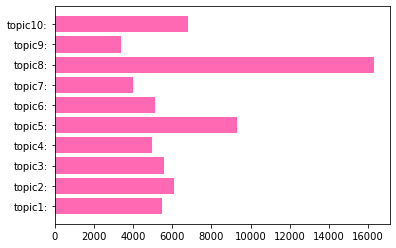

In [89]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([f'topic{i+1}:' for i in range(10)])
y = freq

plt.barh(x, y,color = "hotpink")
plt.show()

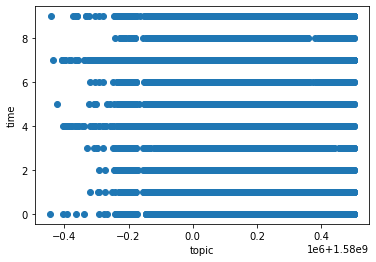

In [10]:
y=data['Topic']
x=dataset['timestamp']
plt.scatter(x, y)
plt.xlabel("topic")
plt.ylabel("time")
# plt.legend(loc='upper left')
plt.show()

In [32]:
y=data['Topic']
x=dataset['timestamp']
time=[[],[],[],[],[],[],[],[],[],[]]
for i in range(len(x)):
    time[y[i]].append(x[i] )
len(time[0])

5499

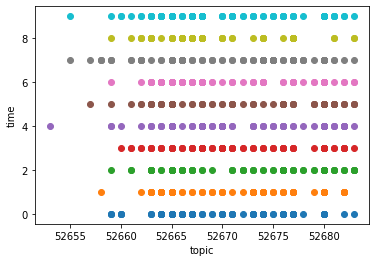

In [40]:
NUMBER=100
for j in range(10):
    plt.scatter(time[j][-NUMBER:], [j]*NUMBER) 
plt.xlabel("topic")
plt.ylabel("time")
# plt.legend(loc='upper left')
plt.show()